# Python Deep Dive Analysis

In [29]:
import mysql.connector as sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
mydb=sql.connect(
host='localhost',
user='root',
password='Nithish@58525',
database='bank',
use_pure=True

)

In [31]:
cursor = mydb.cursor()
cursor.execute("SHOW TABLES")

In [32]:
# Fetch all the table names
tables = cursor.fetchall()

# Display the tables
for table in tables:
    print(table[0]) 


bankchurners
basic_client_info
demographics
enriched_churn_data


In [33]:
table1 = 'bankchurners'
table2 = 'basic_client_info'
table3 = 'enriched_churn_data'

bank_churners_df = pd.read_sql(f"SELECT * FROM {table1}", mydb)
basic_client_info_df = pd.read_sql(f"SELECT * FROM {table2}", mydb)
enriched_churn_df = pd.read_sql(f"SELECT * FROM {table3}", mydb)

C:\Users\nunav\AppData\Local\Temp\ipykernel_14368\2240947603.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bank_churners_df = pd.read_sql(f"SELECT * FROM {table1}", mydb)
C:\Users\nunav\AppData\Local\Temp\ipykernel_14368\2240947603.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  basic_client_info_df = pd.read_sql(f"SELECT * FROM {table2}", mydb)
C:\Users\nunav\AppData\Local\Temp\ipykernel_14368\2240947603.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  enriched_churn_df = pd.read_sql(f"SELECT * FROM {table3}",

In [34]:
print(bank_churners_df.head())
print(basic_client_info_df.head())
print(enriched_churn_df.head())

   CLIENTNUM     Attrition_Flag  Dependent_count Card_Category  \
0  768805383  Existing Customer                3          Blue   
1  818770008  Existing Customer                5          Blue   
2  713982108  Existing Customer                3          Blue   
3  769911858  Existing Customer                4          Blue   
4  709106358  Existing Customer                3          Blue   

   Months_on_book  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39                       1                      3   
1              44                       1                      2   
2              36                       1                      0   
3              34                       4                      1   
4              21                       1                      0   

   Credit_Limit  Avg_Open_To_Buy  Avg_Utilization_Ratio  
0       12691.0          11914.0                  0.061  
1        8256.0           7392.0                  0.105  
2        3418.0     

In [35]:
bank_churners_df.head(3)

,CLIENTNUM,Attrition_Flag,Dependent_count,Card_Category,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_Open_To_Buy,Avg_Utilization_Ratio
0,768805383,Existing Customer,3,Blue,39,1,3,12691.0,11914.0,0.061
1,818770008,Existing Customer,5,Blue,44,1,2,8256.0,7392.0,0.105
2,713982108,Existing Customer,3,Blue,36,1,0,3418.0,3418.0,0.000


In [36]:
basic_client_info_df.head(3)

,CLIENTNUM,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category
0,768805383,45,M,High School,Married,$60K - $80K
1,818770008,49,F,Graduate,Single,Less than $40K
2,713982108,51,M,Graduate,Married,$80K - $120K


In [37]:
enriched_churn_df.head(3)

,CLIENTNUM,Total_Relationship_Count,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,768805383,5,777,1.335,1144,42,1.625
1,818770008,6,864,1.541,1291,33,3.714
2,713982108,4,0,2.594,1887,20,2.333


<br>

## Summary Statistics Short Analysis

Here I want to understand the characteristics of the dataset including basic statistics, central tendency, count of unique values in each column, whether or not there are missing values and any outliers in numerical columns. 

I will then assess important information about the variability, skewness of the data, after dealing with outliers if any are present.

This analysis will be done on all 3 datasets in the following order:
- First, the **bank_churners** dataset
- Next, the **basic_client_info** dataset
- And finally, the **enriched_churn_df** dataset

<br>

### Summary Statistics of the bank churners dataset

In [38]:
# Checking to see basic statistics of the numerical columns in the bank churners dataset
bank_churners_df.describe()

,CLIENTNUM,Dependent_count,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_Open_To_Buy,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,2.346203,35.928409,2.341167,2.455317,8631.953698,7469.139637,0.274894
std,3.690378e+07,1.298908,7.986416,1.010622,1.106225,9088.776650,9090.685324,0.275691
min,7.080821e+08,0.000000,13.000000,0.000000,0.000000,1438.300000,3.000000,0.000000
25%,7.130368e+08,1.000000,31.000000,2.000000,2.000000,2555.000000,1324.500000,0.023000
50%,7.179264e+08,2.000000,36.000000,2.000000,2.000000,4549.000000,3474.000000,0.176000
75%,7.731435e+08,3.000000,40.000000,3.000000,3.000000,11067.500000,9859.000000,0.503000
max,8.283431e+08,5.000000,56.000000,6.000000,6.000000,34516.000000,34516.000000,0.999000


**Checking for outliers**

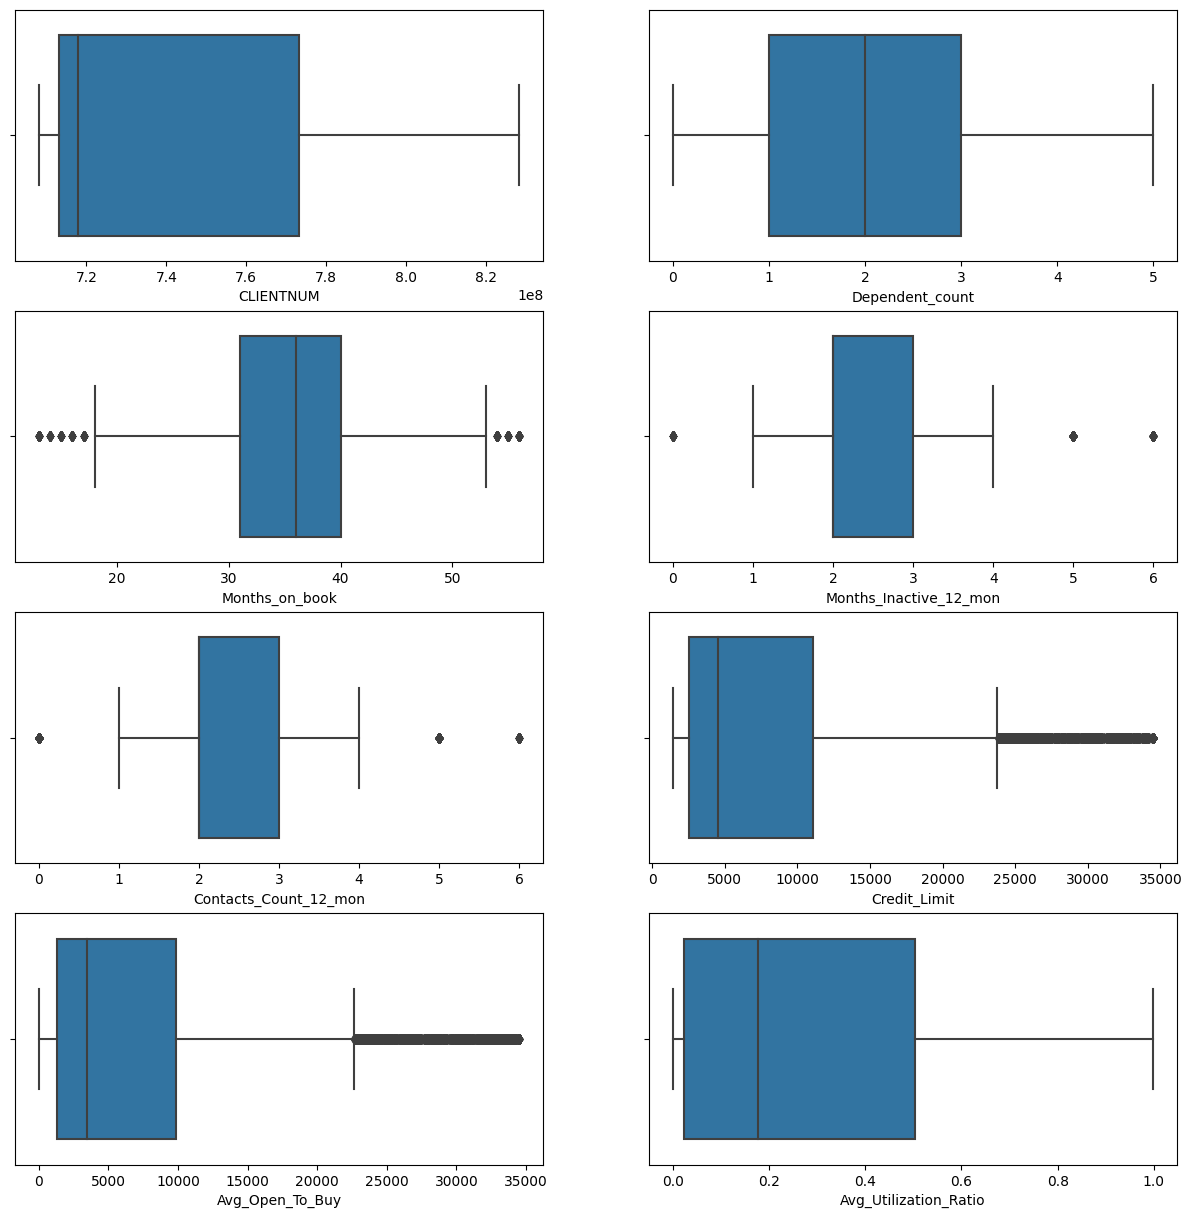





There are no outliers in the 'CLIENTNUM' column 


The 'Attrition_Flag' column is not a numerical column 


There are no outliers in the 'Dependent_count' column 


The 'Card_Category' column is not a numerical column 


There are no outliers in the 'Avg_Utilization_Ratio' column 


 Detected too many potential outliers in the following columns: ['Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy']. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.


------------------------------end------------------------------


In [39]:
# Create two empty lists, one to store names of categorical variables, and the other for numerical variables
cat_vars = []
num_vars = []

# Iterate through the names of columns/variables in bank_churners_df, and add variables to the appropriate list 
# depending on whether the are categorical or numerical
for column_name in bank_churners_df.columns:
    if bank_churners_df[column_name].dtype == 'object':        
        cat_vars.append(column_name)
    else:
        num_vars.append(column_name)

# Set the figure size
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
# Reshape the axs array into a one-dimensional array by flattening its elements
axs = axs.flatten()        

# Iterate through the list for numerical variables and create box plots of data in each numerical variable
for i, var in enumerate(num_vars):
    # Using Seaborn's box plot for outlier detection
    sns.boxplot(x=var, data=bank_churners_df, ax=axs[i])

# Adjust the figure's subplot positions and margins, and then display the figure
fig.tight_layout
plt.show();

# New line spacing
print('\n\n')

# Create new list to hold columns/variables that may have too many potential outliers
outlier_vars = []

# Iterate through the variables again and provide explanation as to whether or not outliers were detected and next steps
for column_name in bank_churners_df.columns:
    if bank_churners_df[column_name].dtype == 'object':
        print(f"\nThe '{column_name}' column is not a numerical column \n")
    else:
        # Using the general rule for identifying potential outliers which is that if any data point in a dataset is more than 
        # Q3 + 1.5xIQR or less than Q1 - 1.5xIQR, it's a high outlier. I would create a custom dictionary to capture potential outliers in each column.
        data = bank_churners_df[column_name]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr
        outliers = dict(data[(data < iqr_lower) | (data > iqr_upper)])
        
        list_of_outliers = list(outliers.values())
        rows_with_outliers = list(outliers.keys())
        
        # If no potential outliers detected, print message below
        if len(list_of_outliers) == 0:
            print(f"\nThere are no outliers in the '{column_name}' column \n")
         
        else:
            # If potential outliers detected were more than 10, add column name to the list of columns with possible outliers
            if len(list_of_outliers) > 10:
                outlier_vars.append(column_name)
            
            # If not, print message below
            else:
                print(f"\nThe potential ouliers in the '{column_name}' column are:\n{list_of_outliers} \nAnd the respective rows with the potential outlier are:\n{rows_with_outliers}")

# Print message to explain next steps to validate outliers 
print(f"\n Detected too many potential outliers in the following columns: {outlier_vars}. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.\n")

# Print custom border at the end
print("\n" + "-"*30 + "end" + "-"*30)

**Observation:** Based on the general rule for identifying potential outliers which is that if any data point in a dataset is more than Q3 + (1.5 x IQR) or less than Q1 - (1.5 x IQR), it's a high outlier, I want to get the lower and upper interquartile ranges for each column and use that to review the summary statistics to know if the min & max values of each column in the dataset can be considered as outliers based on the definition of the column/variable.

In [40]:
# Printing the Lower and upper interquartile ranges for all the columns in the dataset.
variables = pd.DataFrame(columns=['Variable','Lower Limit','Upper Limit'])

nan_columns = []
for i, var in enumerate(bank_churners_df.columns):
    if var == 'clientnum':
        iqr_lower = np.NaN
        iqr_upper = np.NaN
        nan_columns.append(var)
        
    elif bank_churners_df[var].dtype == 'object':
        iqr_lower = np.NaN
        iqr_upper = np.NaN
        nan_columns.append(var)
        
    else:
        df = bank_churners_df[var]
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr
    
    variables.loc[i] = [var, iqr_lower, iqr_upper]
    
print(f"\nFor the following variables with null values: {nan_columns}, clientnum is not applicable as it is only a unique id number for each client in the dataset. The others are of string/object datatypes. Hence the null values \n")

variables


For the following variables with null values: ['Attrition_Flag', 'Card_Category'], clientnum is not applicable as it is only a unique id number for each client in the dataset. The others are of string/object datatypes. Hence the null values 



,Variable,Lower Limit,Upper Limit
0,CLIENTNUM,6.228766e+08,8.633037e+08
1,Attrition_Flag,NaN,NaN
2,Dependent_count,-2.000000e+00,6.000000e+00
3,Card_Category,NaN,NaN
4,Months_on_book,1.750000e+01,5.350000e+01
5,Months_Inactive_12_mon,5.000000e-01,4.500000e+00
6,Contacts_Count_12_mon,5.000000e-01,4.500000e+00
7,Credit_Limit,-1.021375e+04,2.383625e+04
8,Avg_Open_To_Buy,-1.147725e+04,2.266075e+04
9,Avg_Utilization_Ratio,-6.970000e-01,1.223000e+00


<br>

**So are there outliers or not?**

After reading the column/variable definition and comparing the lower and upper Limits for each column to the min & max values, it is safe to assume that the potential outliers that were detected, are actually not outliers

In [41]:
# Checking to know the datatypes of each column and if there are any missing values
bank_churners_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLIENTNUM               10127 non-null  int64  
 1   Attrition_Flag          10127 non-null  object 
 2   Dependent_count         10127 non-null  int64  
 3   Card_Category           10127 non-null  object 
 4   Months_on_book          10127 non-null  int64  
 5   Months_Inactive_12_mon  10127 non-null  int64  
 6   Contacts_Count_12_mon   10127 non-null  int64  
 7   Credit_Limit            10127 non-null  float64
 8   Avg_Open_To_Buy         10127 non-null  float64
 9   Avg_Utilization_Ratio   10127 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 791.3+ KB


There are 10 columns and 10127 rows in the dataset with no mising values in each of the columns. The datatypes for each of the columns are now known, as shown above

In [42]:
# Checking to see if there are any duplicates in the dataset. This is the count of unique entries (i.e rows) in the dataset.
bank_churners_df[bank_churners_df.duplicated()].count()

CLIENTNUM                 0
Attrition_Flag            0
Dependent_count           0
Card_Category             0
Months_on_book            0
Months_Inactive_12_mon    0
Contacts_Count_12_mon     0
Credit_Limit              0
Avg_Open_To_Buy           0
Avg_Utilization_Ratio     0
dtype: int64

From above, no duplicated rows were found in the dataframe. So I assume that all rows are unique.

Next I want to check for unique values in each column of the dataframe

In [43]:
# Checking for unique variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(bank_churners_df.columns):
    variables.loc[i] = [var, bank_churners_df[var].nunique(), bank_churners_df[var].unique().tolist()]
    
variables

,Variable,Number of unique values,Values
0,CLIENTNUM,10127,"[768805383, 818770008, 713982108, 769911858, 7..."
1,Attrition_Flag,2,"[Existing Customer, Attrited Customer]"
2,Dependent_count,6,"[3, 5, 4, 2, 0, 1]"
3,Card_Category,4,"[Blue, Gold, Silver, Platinum]"
4,Months_on_book,44,"[39, 44, 36, 34, 21, 46, 27, 31, 54, 30, 48, 3..."
5,Months_Inactive_12_mon,7,"[1, 4, 2, 3, 6, 0, 5]"
6,Contacts_Count_12_mon,7,"[3, 2, 0, 1, 4, 5, 6]"
7,Credit_Limit,6205,"[12691.0, 8256.0, 3418.0, 3313.0, 4716.0, 4010..."
8,Avg_Open_To_Buy,6813,"[11914.0, 7392.0, 3418.0, 796.0, 4716.0, 2763...."
9,Avg_Utilization_Ratio,964,"[0.061, 0.105, 0.0, 0.76, 0.311, 0.066, 0.048,..."


**Observation:**
Looks like the bank_churners table has some interesting data with lots of unique values to explore. Only the 'clientnum' column has a unique value for all 10127 rows in the dataset, and this is because this variable contains all client id/number which are expected to be unique to each client.

Interesting variables to explore based on their number of unique values include:
`attrition_flag`, `dependent_count`, `card_category`, `months_inactive_12_mon`, `contacts_count_12_mon`

For the `months_on_book` variable, it may be worth grouping them per number of years. E.g clients with months on book from 0 to 12 months could be grouped as "New Clients", then 13 to 24 months as "Established Clients" ...etc

<br>

### Summary Statistics of the basic client info dataset

In [44]:
# Checking to see basic statistics of the numerical columns in the basic client info dataset
basic_client_info_df.describe()

,CLIENTNUM,Customer_Age
count,1.012700e+04,10127.000000
mean,7.391776e+08,46.325960
std,3.690378e+07,8.016814
min,7.080821e+08,26.000000
25%,7.130368e+08,41.000000
50%,7.179264e+08,46.000000
75%,7.731435e+08,52.000000
max,8.283431e+08,73.000000


In [45]:
# Checking for outliers 

for column_name in basic_client_info_df.columns:
    if basic_client_info_df[column_name].dtype == 'object':
        print(f"\nThe '{column_name}' column is not a numerical column")
    else:
        data = basic_client_info_df[column_name]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr
        outliers = dict(data[(data < iqr_lower) | (data > iqr_upper)])

        list_of_outliers = list(outliers.values())
        rows_with_outliers = list(outliers.keys())

        if len(list_of_outliers) == 0:
            print(f"\nThere are no outliers in the '{column_name}' column")
        else:
            if len(list_of_outliers) > 10:
                # Using Seaborn's box plot for outlier detection
                sns.boxplot(x=column_name, data=basic_client_info_df)
                plt.title(f"\nChecking for Outliers in {column_name}")
                plt.xlabel(f"\n{column_name}")
                plt.show()
                print(f"\nDetected too many potential outliers in the '{column_name}' column to show. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.")
            else:
                print(f"\nThe potential ouliers in the '{column_name}' column are: {list_of_outliers} and the respective rows with the potential outliers are: {rows_with_outliers}")
                
print("\n" + "-"*30 + "end" + "-"*30)


There are no outliers in the 'CLIENTNUM' column

The potential ouliers in the 'Customer_Age' column are: [73, 70] and the respective rows with the potential outliers are: [251, 254]

The 'Gender' column is not a numerical column

The 'Education_Level' column is not a numerical column

The 'Marital_Status' column is not a numerical column

The 'Income_Category' column is not a numerical column

------------------------------end------------------------------


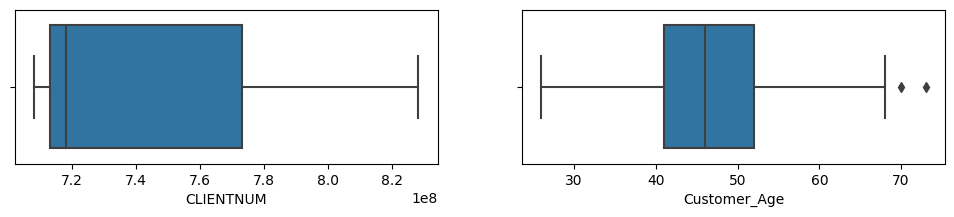





There are no outliers in the 'CLIENTNUM' column 


The potential ouliers in the 'Customer_Age' column are:
[73, 70] 
And the respective rows with the potential outlier are:
[251, 254]

The 'Gender' column is not a numerical column 


The 'Education_Level' column is not a numerical column 


The 'Marital_Status' column is not a numerical column 


The 'Income_Category' column is not a numerical column 


 Detected too many potential outliers in the following columns: []. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.


------------------------------end------------------------------


In [46]:
# Create two empty lists, one to store names of categorical variables, and the other for numerical variables
cat_vars = []
num_vars = []

# Iterate through the names of columns/variables in bank_churners_df, and add variables to the appropriate list 
# depending on whether the are categorical or numerical
for column_name in basic_client_info_df.columns:
    if basic_client_info_df[column_name].dtype == 'object':        
        cat_vars.append(column_name)
    else:
        num_vars.append(column_name)

# Set the figure size
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 2))
# Reshape the axs array into a one-dimensional array by flattening its elements
axs = axs.flatten()        

# Iterate through the list for numerical variables and create box plots of data in each numerical variable
for i, var in enumerate(num_vars):
    # Using Seaborn's box plot for outlier detection
    sns.boxplot(x=var, data=basic_client_info_df, ax=axs[i])

# Adjust the figure's subplot positions and margins, and then display the figure
fig.tight_layout
plt.show();

# New line spacing
print('\n\n')

# Create new list to hold columns/variables that may have too many potential outliers
outlier_vars = []

# Iterate through the variables again and provide explanation as to whether or not outliers were detected and next steps
for column_name in basic_client_info_df.columns:
    if basic_client_info_df[column_name].dtype == 'object':
        print(f"\nThe '{column_name}' column is not a numerical column \n")
    else:
        # Using the general rule for identifying potential outliers which is that if any data point in a dataset is more than 
        # Q3 + 1.5xIQR or less than Q1 - 1.5xIQR, it's a high outlier. I would create a custom dictionary to capture potential outliers in each column.
        data = basic_client_info_df[column_name]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr
        outliers = dict(data[(data < iqr_lower) | (data > iqr_upper)])
        
        list_of_outliers = list(outliers.values())
        rows_with_outliers = list(outliers.keys())
        
        # If no potential outliers detected, print message below
        if len(list_of_outliers) == 0:
            print(f"\nThere are no outliers in the '{column_name}' column \n")
         
        else:
            # If potential outliers detected were more than 10, add column name to the list of columns with possible outliers
            if len(list_of_outliers) > 10:
                outlier_vars.append(column_name)
            
            # If not, print message below
            else:
                print(f"\nThe potential ouliers in the '{column_name}' column are:\n{list_of_outliers} \nAnd the respective rows with the potential outlier are:\n{rows_with_outliers}")

# Print message to explain next steps to validate outliers 
print(f"\n Detected too many potential outliers in the following columns: {outlier_vars}. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.\n")

# Print custom border at the end
print("\n" + "-"*30 + "end" + "-"*30)

**Observation:** 

Detected 73 and 70 in the 'customer_age' column as potential outliers. After consulting with the data definition for that variable and comparing these potential outliers to the Q1 & Q3 values from the basic statistics above, my suggestion would be to keep these rows but exclude them when asking questions such as the average or mean age of clients of the bank.

In [47]:
# Checking to know the datatypes of each column and if there are any missing values
basic_client_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLIENTNUM        10127 non-null  int64 
 1   Customer_Age     10127 non-null  int64 
 2   Gender           10127 non-null  object
 3   Education_Level  10127 non-null  object
 4   Marital_Status   10127 non-null  object
 5   Income_Category  10127 non-null  object
dtypes: int64(2), object(4)
memory usage: 474.8+ KB


There are 6 columns and 10127 rows in the dataset with no mising values in each of the columns. The datatypes for each of the columns are now known, as shown above

In [48]:
# Checking to see if there are any duplicates in the dataset. This is the count of unique entries (i.e rows) in the dataset.
basic_client_info_df[basic_client_info_df.duplicated()].count()

CLIENTNUM          0
Customer_Age       0
Gender             0
Education_Level    0
Marital_Status     0
Income_Category    0
dtype: int64

No duplicated rows were found in the dataframe. So I assume that all rows are unique.

Next I want to check for unique values in each column of the dataframe

In [49]:
# Just like before, I'm using a for loop for this step so that I don't have to repeat the process for each column in the  basic_client_info_df dataframe

variables = pd.DataFrame(columns=['Variable','No of unique values','Values'])

for i, var in enumerate(basic_client_info_df.columns):
    variables.loc[i] = [var, basic_client_info_df[var].nunique(), basic_client_info_df[var].unique().tolist()]
    
variables

,Variable,No of unique values,Values
0,CLIENTNUM,10127,"[768805383, 818770008, 713982108, 769911858, 7..."
1,Customer_Age,45,"[45, 49, 51, 40, 44, 32, 37, 48, 42, 65, 56, 3..."
2,Gender,2,"[M, F]"
3,Education_Level,7,"[High School, Graduate, Uneducated, Unknown, C..."
4,Marital_Status,4,"[Married, Single, Unknown, Divorced]"
5,Income_Category,6,"[$60K - $80K, Less than $40K, $80K - $120K, $4..."


**Observation:**

Just like in the previous dataset, only the 'clientnum' column has a unique value for all 10127 rows in the dataset, and this is because this variable contains all client id/number which are expected to be unique to each client.

The basic_client_info_df dataset contains demographic information about the bank's clients and would be very critical in understanding client behaviour and trends amongst the different client segments.

<br>

### Summary Statistics of the enriched churn dataset

In [50]:
# Checking to see basic statistics of the numerical columns in the enriched churn dataset
enriched_churn_df.describe()

,CLIENTNUM,Total_Relationship_Count,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,3.812580,1162.814061,0.759941,4404.086304,64.858695,0.712222
std,3.690378e+07,1.554408,814.987335,0.219207,3397.129254,23.472570,0.238086
min,7.080821e+08,1.000000,0.000000,0.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,3.000000,359.000000,0.631000,2155.500000,45.000000,0.582000
50%,7.179264e+08,4.000000,1276.000000,0.736000,3899.000000,67.000000,0.702000
75%,7.731435e+08,5.000000,1784.000000,0.859000,4741.000000,81.000000,0.818000
max,8.283431e+08,6.000000,2517.000000,3.397000,18484.000000,139.000000,3.714000


**Checking for Outliers**

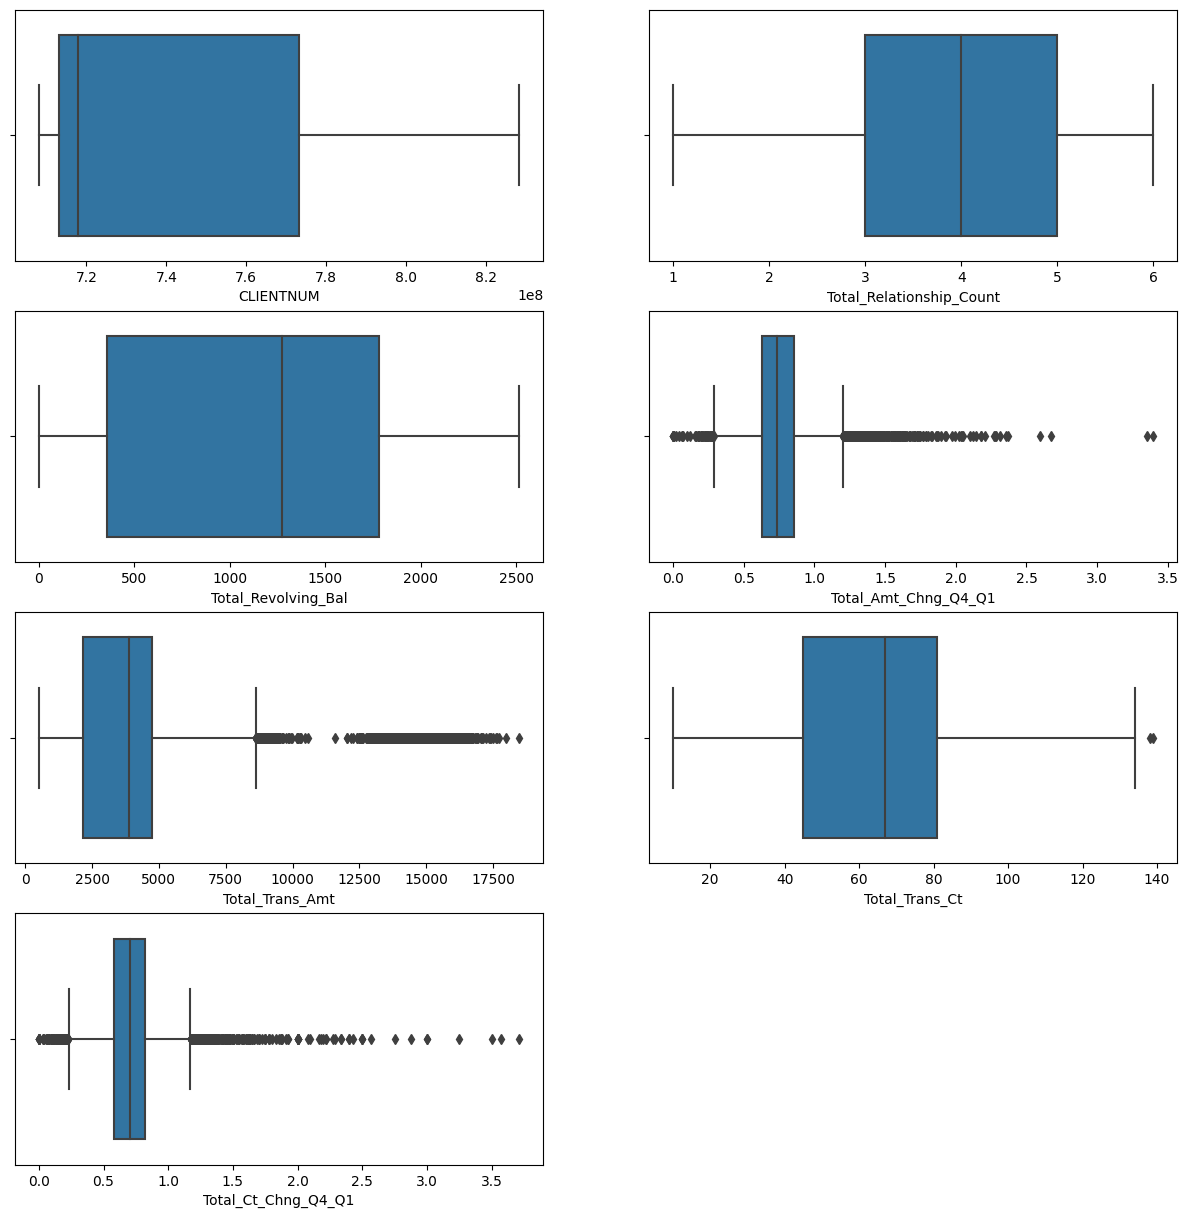





There are no outliers in the 'CLIENTNUM' column 


There are no outliers in the 'Total_Relationship_Count' column 


There are no outliers in the 'Total_Revolving_Bal' column 


The potential ouliers in the 'Total_Trans_Ct' column are:
[139, 138] 
And the respective rows with the potential outlier are:
[9324, 9586]

 Detected too many potential outliers in the following columns: ['Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1']. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.


------------------------------end------------------------------


In [51]:
# Create two empty lists, one to store names of categorical variables, and the other for numerical variables
cat_vars = []
num_vars = []

# Iterate through the names of columns/variables in bank_churners_df, and add variables to the appropriate list 
# depending on whether the are categorical or numerical
for column_name in enriched_churn_df.columns:
    if enriched_churn_df[column_name].dtype == 'object':        
        cat_vars.append(column_name)
    else:
        num_vars.append(column_name)

# Set the figure size
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
# Reshape the axs array into a one-dimensional array by flattening its elements
axs = axs.flatten()        

# Iterate through the list for numerical variables and create box plots of data in each numerical variable
for i, var in enumerate(num_vars):
    # Using Seaborn's box plot for outlier detection
    sns.boxplot(x=var, data=enriched_churn_df, ax=axs[i])

# Remove the subplot at index 7 from the axs array within the current figure
fig.delaxes(axs[7])

# Adjust the figure's subplot positions and margins, and then display the figure
fig.tight_layout
plt.show();

# New line spacing
print('\n\n')

# Create new list to hold columns/variables that may have too many potential outliers
outlier_vars = []

# Iterate through the variables again and provide explanation as to whether or not outliers were detected and next steps
for column_name in enriched_churn_df.columns:
    if enriched_churn_df[column_name].dtype == 'object':
        print(f"\nThe '{column_name}' column is not a numerical column \n")
    else:
        # Using the general rule for identifying potential outliers which is that if any data point in a dataset is more than 
        # Q3 + 1.5xIQR or less than Q1 - 1.5xIQR, it's a high outlier. I would create a custom dictionary to capture potential outliers in each column.
        data = enriched_churn_df[column_name]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr
        outliers = dict(data[(data < iqr_lower) | (data > iqr_upper)])
        
        list_of_outliers = list(outliers.values())
        rows_with_outliers = list(outliers.keys())
        
        # If no potential outliers detected, print message below
        if len(list_of_outliers) == 0:
            print(f"\nThere are no outliers in the '{column_name}' column \n")
         
        else:
            # If potential outliers detected were more than 10, add column name to the list of columns with possible outliers
            if len(list_of_outliers) > 10:
                outlier_vars.append(column_name)
            
            # If not, print message below
            else:
                print(f"\nThe potential ouliers in the '{column_name}' column are:\n{list_of_outliers} \nAnd the respective rows with the potential outlier are:\n{rows_with_outliers}")

# Print message to explain next steps to validate outliers 
print(f"\n Detected too many potential outliers in the following columns: {outlier_vars}. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.\n")

# Print custom border at the end
print("\n" + "-"*30 + "end" + "-"*30)

**Observation:** 

Detected 138 and 139 in the 'total_trans_ct' column as potential outliers. After consulting with the data definition for that variable, 'total_trans_ct' represents the total transaction count a client made in the last 12 months. This data would be useful to identify active clients that may be interested in using other bank products and services, hence my suggestion would be to keep them.

In [52]:
# Checking to know the datatypes of each column and if there are any missing values
enriched_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Total_Relationship_Count  10127 non-null  int64  
 2   Total_Revolving_Bal       10127 non-null  int64  
 3   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 4   Total_Trans_Amt           10127 non-null  int64  
 5   Total_Trans_Ct            10127 non-null  int64  
 6   Total_Ct_Chng_Q4_Q1       10127 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 553.9 KB


There are 7 columns and 10127 rows in the dataset with no mising values in each of the columns. The datatypes for each of the columns are now known, as shown above

In [53]:
# Checking to see if there are any duplicates in the dataset. This is the count of unique entries (i.e rows) in the dataset.
enriched_churn_df[enriched_churn_df.duplicated()].count()

CLIENTNUM                   0
Total_Relationship_Count    0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
dtype: int64

No duplicated rows were found in the dataframe.

Next I want to check for unique values in each column of the dataframe

In [54]:
# Again I'm using a for loop for this step so that I don't have to repeat the process for each column in the  basic_client_info_df dataframe

variables = pd.DataFrame(columns=['Variable','No of unique values','Values'])

for i, var in enumerate(enriched_churn_df.columns):
    variables.loc[i] = [var, enriched_churn_df[var].nunique(), enriched_churn_df[var].unique().tolist()]
    
variables

,Variable,No of unique values,Values
0,CLIENTNUM,10127,"[768805383, 818770008, 713982108, 769911858, 7..."
1,Total_Relationship_Count,6,"[5, 6, 4, 3, 2, 1]"
2,Total_Revolving_Bal,1974,"[777, 864, 0, 2517, 1247, 2264, 1396, 1677, 14..."
3,Total_Amt_Chng_Q4_Q1,1158,"[1.335, 1.541, 2.594, 1.405, 2.175, 1.376, 1.9..."
4,Total_Trans_Amt,5033,"[1144, 1291, 1887, 1171, 816, 1088, 1330, 1538..."
5,Total_Trans_Ct,126,"[42, 33, 20, 28, 24, 31, 36, 32, 26, 17, 29, 2..."
6,Total_Ct_Chng_Q4_Q1,830,"[1.625, 3.714, 2.333, 2.5, 0.846, 0.722, 0.714..."


**Observation:**

Again, just like in the previous dataset, only the 'clientnum' column has a unique value for all 10127 rows in the dataset, and this is because this variable contains all client id/number which are expected to be unique to each client.

The enriched_churn dataset contains enriched data about each client's use of their credit cards including the total revolving balance on the credit card, total transaction amounts and number of transactions in the last 12 months. These data points can be used to understand client spending and repayment habits while using their credit cards. It will also be ued for in-depth analysis to help the bank understand the main reasons why clients are churning and leaving its credit card services.

<br>

## Data Cleaning

In the summary statistics analysis, Pandas.DataFrame methods were used to assess dataset properties. 'df.info()' provided summary information, 'df.describe()' offered descriptive statistics, and 'df.value_counts()' counted unique values. I perfomed outlier detection and data was validated to check if identified values were actually outliers.
Additionally, I needed to convert the 'Clientnum' variable from an integer datatype to a string/object datatype for numerical analysis tasks. I used the define-code-test framework to perform this cleaning task.

_Note: Storing unique ids as integers in SQL databases is good practice due to performance and efficiency reasons (integers take up less space in memory than strings, leading to faster joins and more efficient processing). I needed to convert this variable to strings only for the sake of numerical analysis such as cross-correlation analysis, descriptive stats and answering data questions._

<br>

My approach to data cleaning was to make a copy of each dataset first, so that if there any issues I have my original dataset intact. I then used the define-code-test framework for data cleaning, which involves defining cleaning steps using verbs and action words that clearly describe the cleaning tasks, performing the cleaning tasks accordingly and testing programmatically to see if my desired results were achieved.

In [61]:
# Making copies of all 3 datasets
df1 = bank_churners_df.copy()
df2 = basic_client_info_df.copy()
df3 = enriched_churn_df.copy()

# And then joining the resulting dataframes into one master dataset for easier access and manipulation
df = df1.merge(df2, on='CLIENTNUM').merge(df3, on='CLIENTNUM')

# Checking to make sure all 3 dataframes and their respective columns were joined correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Card_Category             10127 non-null  object 
 4   Months_on_book            10127 non-null  int64  
 5   Months_Inactive_12_mon    10127 non-null  int64  
 6   Contacts_Count_12_mon     10127 non-null  int64  
 7   Credit_Limit              10127 non-null  float64
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Avg_Utilization_Ratio     10127 non-null  float64
 10  Customer_Age              10127 non-null  int64  
 11  Gender                    10127 non-null  object 
 12  Education_Level           10127 non-null  object 
 13  Marital_Status            10127 non-null  object 
 14  Income

Index(['CLIENTNUM', 'Total_Relationship_Count', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1'],
      dtype='object')

<br>

### Quality Issue to be Cleaned

#### Define
Change datatypes of clientnum variable in all 3 datasets from integer to string/object datatype

_Note: Even though storing unique ids as integers in SQL databases is good practice due to performance and efficiency reasons (integers take up less space in memory than strings, leading to faster joins and more efficient processing), I still needed to convert this variable to strings for the sake of numerical analysis that I want to perform such as cross-correlation analysis, descriptive stats and answering data questions._

<br>

#### Code

In [88]:
df = df.astype({'CLIENTNUM': 'int'})

<br>

#### Test

In [89]:
df.CLIENTNUM.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10127 entries, 0 to 10126
Series name: CLIENTNUM
Non-Null Count  Dtype
--------------  -----
10127 non-null  int32
dtypes: int32(1)
memory usage: 39.7 KB


In [90]:
df.dtypes

CLIENTNUM                     int32
Attrition_Flag               object
Dependent_count               int64
Card_Category                object
Months_on_book                int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Avg_Open_To_Buy             float64
Avg_Utilization_Ratio       float64
Customer_Age                  int64
Gender                       object
Education_Level              object
Marital_Status               object
Income_Category              object
Total_Relationship_Count      int64
Total_Revolving_Bal           int64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
dtype: object

<br>

## Distribution Analysis for each of the columns in the dataset

I took a close look at all the columns to know how values were distributed in each column using either a histogram plot to show the distribution in variables with non unique values, or a bar chart to show the distribution in variables where unique values were less than 10.

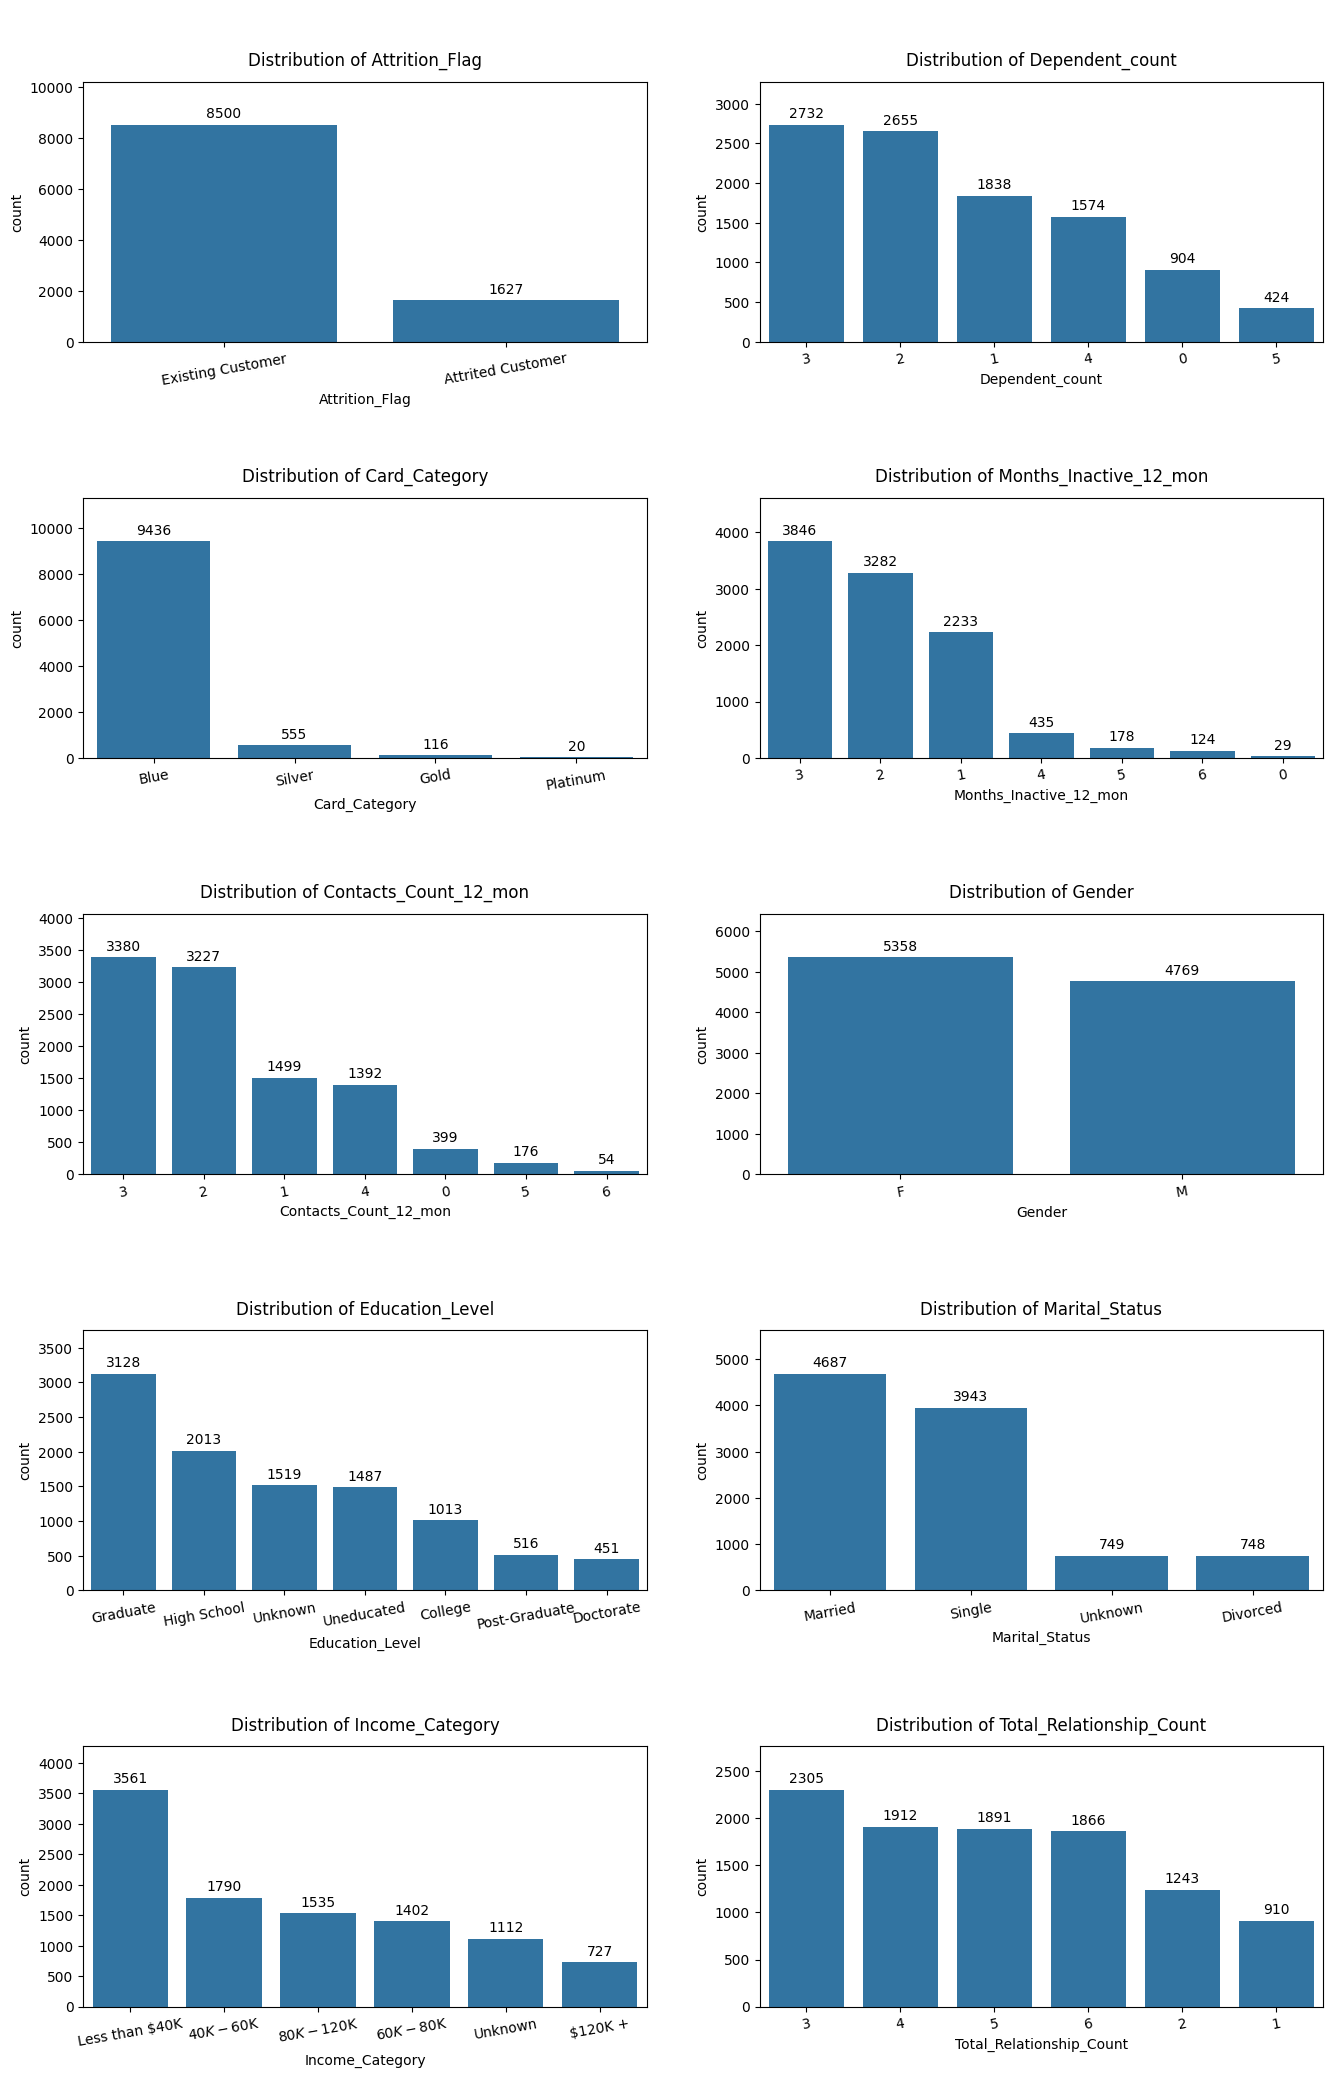

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

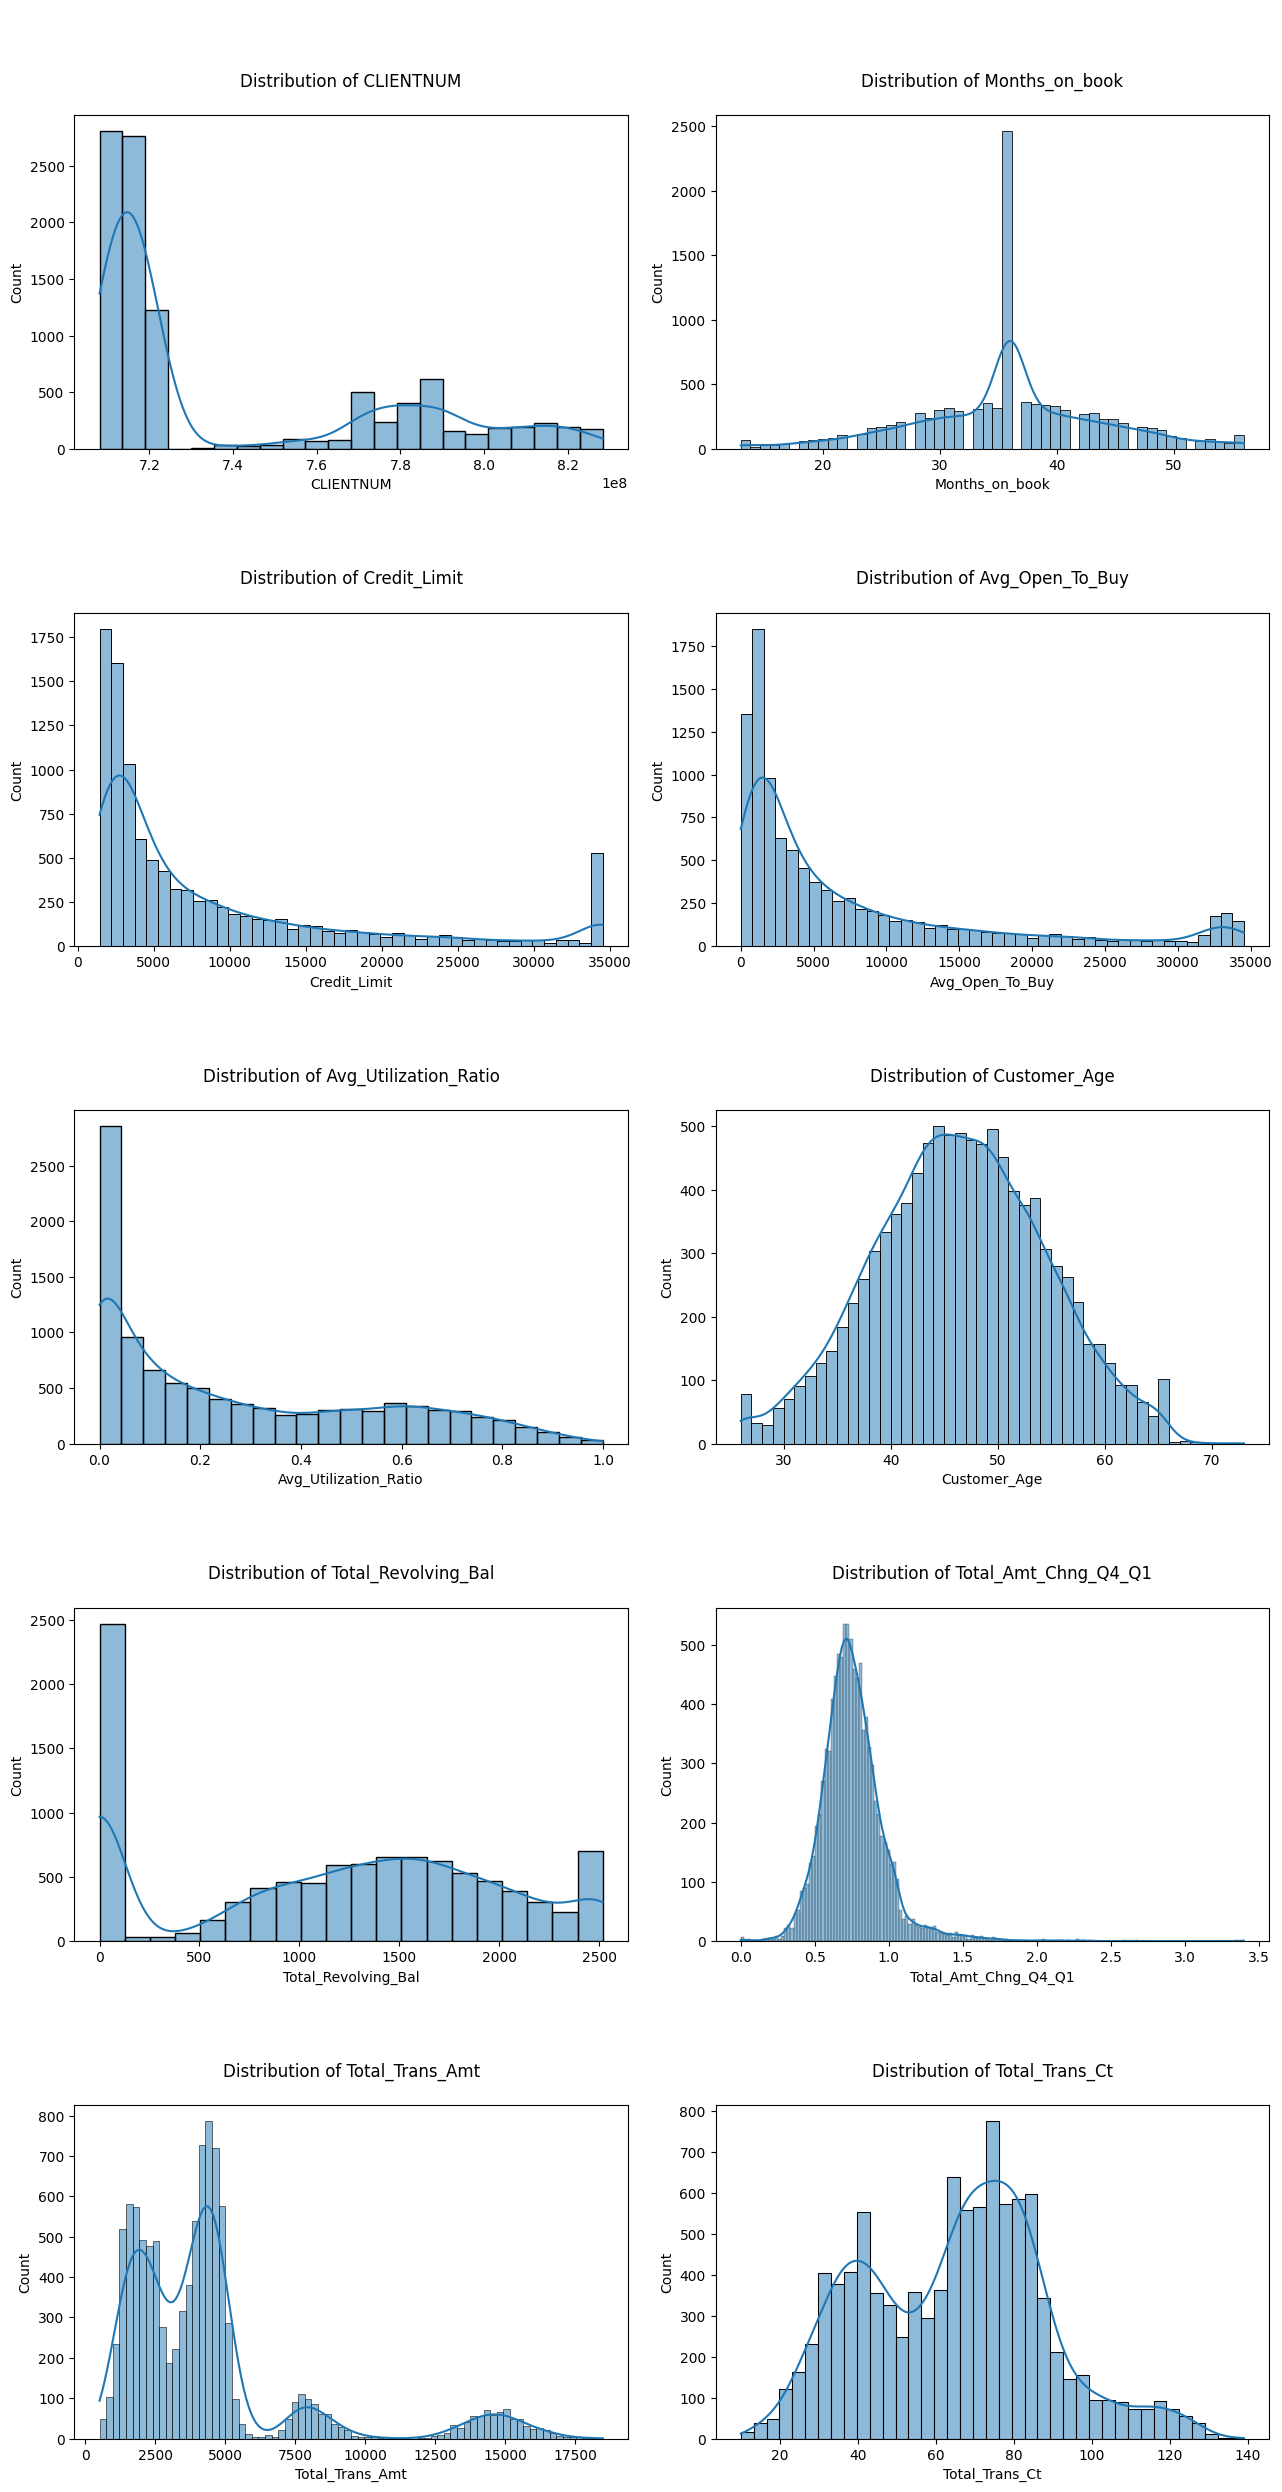

,CLIENTNUM,Months_on_book,Credit_Limit,Avg_Open_To_Buy,Avg_Utilization_Ratio,Customer_Age,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,35.928409,8631.953698,7469.139637,0.274894,46.325960,1162.814061,0.759941,4404.086304,64.858695,0.712222
std,3.690378e+07,7.986416,9088.776650,9090.685324,0.275691,8.016814,814.987335,0.219207,3397.129254,23.472570,0.238086
min,7.080821e+08,13.000000,1438.300000,3.000000,0.000000,26.000000,0.000000,0.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,31.000000,2555.000000,1324.500000,0.023000,41.000000,359.000000,0.631000,2155.500000,45.000000,0.582000
50%,7.179264e+08,36.000000,4549.000000,3474.000000,0.176000,46.000000,1276.000000,0.736000,3899.000000,67.000000,0.702000
75%,7.731435e+08,40.000000,11067.500000,9859.000000,0.503000,52.000000,1784.000000,0.859000,4741.000000,81.000000,0.818000
max,8.283431e+08,56.000000,34516.000000,34516.000000,0.999000,73.000000,2517.000000,3.397000,18484.000000,139.000000,3.714000


In [91]:
# Creating an empty list that will be used to store columns with non unique values, 
# distribution in these columns will be explained using histogram plots and descriptive stats
column_list = []

# Create two empty lists, one to store names of variables with unique vals < 10, and the other for variables with non-unique vals
unique_val_vars = []
non_unique_vars = []

# Iterate through the names of columns/variables in bank_churners_df, and add variables to the appropriate list 
# depending on whether the are categorical or numerical
for column_name in df.columns:
    unique_vals = df[column_name].value_counts().sort_values(ascending=False).index
    unique_count = len(unique_vals)
    
    if unique_count < 10:        
        unique_val_vars.append(column_name)
    else:
        non_unique_vars.append(column_name)

# Set the figure size
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(16, 25))

# Reshape the axs array into a one-dimensional array by flattening its elements
axs = axs.flatten()

# Set the color of the bars to default blue color
plot_color = sns.color_palette()[0]

# Iterate through the list of variables with unique vals < 10 and count plots of data in each variable
for i, var in enumerate(unique_val_vars):
    # Sort the bars in the count plot in descending order using the sorted unique values in the variable
    sorted_order = df[var].value_counts().sort_values(ascending=False).index
    # Create the plot using seaborn's countplot and pass the sorted values in the order parameter,use preset color palette
    plot = sns.countplot(x=var, data=df, ax=axs[i], order=sorted_order, color=plot_color)    
    # Rotate the x-axis tick labels to make then readable
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=10)
    # Set the plot title
    axs[i].set_title(f"\n\nDistribution of {var}\n", y=0.95)
    
    # Add bar labels containing the count
    for p in plot.patches:
        plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
        
    # Set the top margin to  to 110% of the highest bar's count (i.e 1.1 times the maximum count)
    axs[i].set_ylim(0, max(df[var].value_counts()) * 1.2)
    

# Adjust the figure's subplot positions and margins, and then display the figure
plt.subplots_adjust(hspace=0.6)
plt.tight_layout
plt.show();



# Now let's do the same for the variables with non-unique values
# First, calculate the number of rows and columns needed for the subplots
num_rows = (len(non_unique_vars) - 1) // 2 + 1
num_cols = 2

# Set the figure size
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(13, 5 * num_rows))

# Reshape the axs array into a one-dimensional array by flattening its elements
axs = axs.flatten()

# Filter out the 'clientnum' variable from the non_unique_vars list
filtered_non_unique_vars = [var for var in non_unique_vars if var != 'clientnum']

# New loop for filtered_non_unique_vars
for i, var in enumerate(filtered_non_unique_vars):
    # add to list that would be explained also using descriptive stats
    column_list.append(var)
    
    # Plot the distribution histograms using the corresponding axes
    sns.histplot(x=var, data=df, color=plot_color, kde=True, ax=axs[i])
    # Set the plot title
    axs[i].set_title(f'\n\n \nDistribution of {var}\n')
    
    
# Adjust the figure's subplot positions and margins, delete empty plots in the figure, and then display the figure
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
fig.delaxes(axs[10])
fig.delaxes(axs[11])
plt.show();

# Leave space between last histogram plot and the descriptive stats table
print("\n")

# Finally, use descriptive statistics to show how values are distributed in numerical columns
df[column_list].describe()

**Observation**

The attrition_flag column has categorical data and 2 unique values, hence a bar chart is satisfactory to show the distribution of customers who have churned (attrited) to those who are still existing customers. 

Most of the bank's credit card customers have 3 or 2 dependants, while only few have 5 dependants in their care.

The blue credit card category is the most popular with approx. 93% of customers belonging to this card category. In second place is the Silver credit card, and then the Gold credit card. Customers who own a Platinum credit card are very few, accounting for a meager 0.2% of all customers.

In the last 12 months, the majority of customers are inactive for 3 months or less; while only a select few customers have been inactive for longer periods. 

The same trend is also noticed in the number of contacts made by customers, as majority of customers have made contact 3 or 2 times in the last 12 months.

There are more female customers than male customers, with a difference of 589 more female customers than male.

Majority of the credit card customers are graduates accounting for alsmot 31% of all customers, while minority  of the customers have doctorate or post-graduate degrees.

More customers earn less than 40k while less customers earn 120k or higher.

Most customers use 3 of the bank's products. Almost the same number of customers use 4, 5 or 6 of the bank's products. Fewer customers only have 1 product from the bank.

For numerical columns, the table shows the distribution of the variables. 
The shortest recorded month on book for a customer is 13 months while some customers have been around for up to 56 months. 36 months is the median number of months on book for the bank's customers.
There are records of extremely high and extremely low card utilization ratios; however, the median average utilization ratio is 0.18.
The youngest credit card customer is aged 26, while the oldest is aged 73. There are more customers aged 46 as this is the mdeian age.





<br>

## Cross-Correlation Analysis
By cross-examining columns against each other, more insights and broader questions can be asked and answered. So let's see how variables are correlated to each other.
 
 

In [92]:
# Checking correlations between all numeric variable in the dataset
df.corr()

ValueError: could not convert string to float: 'Existing Customer'

ValueError: could not convert string to float: 'Existing Customer'

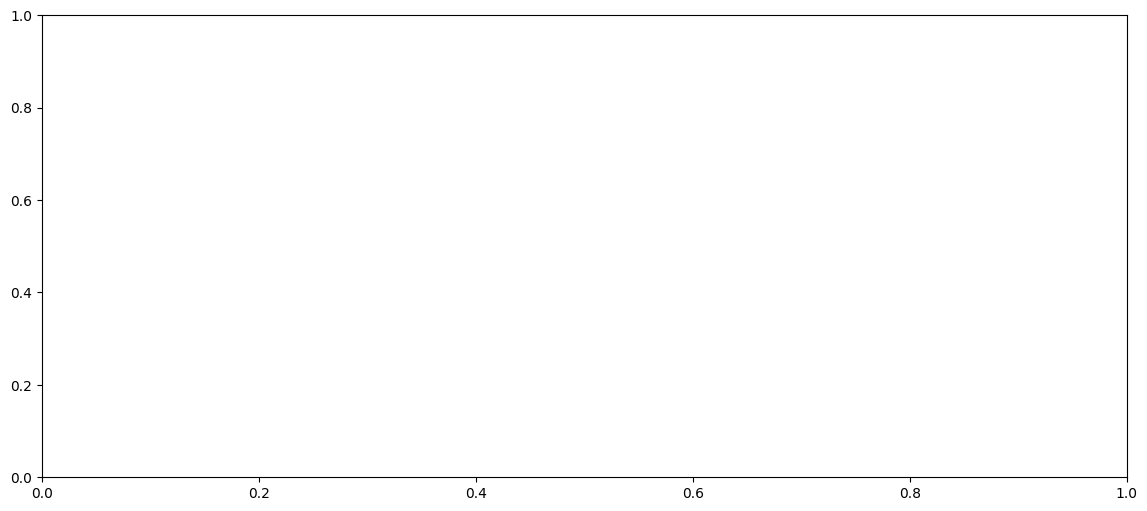

In [87]:
# Let's use correlation heatmaps to display the same information but in a visually appealing way.

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 6))

sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap="rocket_r")

plt.xticks(rotation=75)
plt.show()


The correlation heatmap above helped me to start asking the right questions that can generate useful insights for the bank. Some of them include:
- How long have clients of different ages been customers of the bank's credit card service, and what is the relationship between age and months on book? 
- What is the relationship between credit limit of clients or average open to buy credit, and the avg utilization ratio in the last 12 months? 
- How does transaction amount increase or decrease based on the number of products that clients use? 

To answer these questions, numerical columns can be plotted against each other using scatter plots to better understand the correlation trends between them. For example, making a scatter plot of total transaction count vs total transaction amount, or avg utilization ratio vs total revolving balance. Also numerical columns like months_on_book, months_inactive_12_mon, contacts_count_12_mon and Avg_Utilization_Ratio can be plotted against categorial columns with unique values like attrition_flag, gender, education_level and/or income_category, using preferably a bar chart or other charts like a pie chart or tree map, depending on the number of unique values in the categorical column. 


<br>

## Raising Data Questions
After the distribution and cross-correlation analyses performed above, I now have a better understanding of the bank's dataset, and can raise data questions to try and find clues and answer to help in my investigation.
Grouping by the attrition flag or categorical demographic columns would help in plotting bar charts, pie charts, creating text tables and even tree maps using columns that hold numerical data about credit card usage patterns and repayment habits of all clients of the bank, in order to understand the reasons for leaving and recommend ways the bank can mitigate existing customers from churning.

Some possible data questions that can be raised include:

- How do the total relationship count (i.e number of products customers have) differ between age groups, or gender, or income category or any other demographic? A bar chart of total relationship count (numerical datatype) vs demographic categorical column can be used to answer this question.
- On average, how many of the bank's products do customers typically have? Who are the top or bottom customers by number of the bank's products they have? A histogram plot of the total_relationship_count and a text table showing top and bottom customers of the bank by their total product count, can be used to answer such questions.
- Which is the most popular credit card category? What type of credit card holders have churned the most? What is the credit limit according to the different credit card categories? How much credit is currently available for a customer to use based on the type of credit card they have? A histogram of the card_category, bar chart of card_category vs attrition_flag, text table of average credit_limit grouped by card_category, and a text table of avg_open_to_buy grouped by card_category can answer such questions.
- Does the number of dependents per customer affect their credit card needs or usage? Is there a relationship between dependent count and the type of credit card/credit limit a customer has? Plotting a graph of dependent count vs avg utilization ratio or total_trans_ct can answer the first question. A bar chart of dependent count vs credit limit or card category vs dependent count can answer the second question.
- Who are the top (10 or 20) and bottom (10 or 20) clients based on % change in transaction count or % change in transaction amount from Q1 to Q4? Are there any significant differences in % change for churned customers compared to existing customers? Are there any observed patterns when plotting these % change columns grouped by demographic columns? The total_amt_chng_q4_q1 and total_ct_chng_q4_q1 columns which are both numerical columns  can be used to create a text table of top or bottom (10 or 20) clients based on their unique client numbers (clientnum column). Bar charts can also be used to answer these questions by grouping demographic columns like gender, marital status, education or income category.

But for now, I would select the most investigative questions out of the list of so many questions that can reveal the possible reasons why customers are churning and other insights that might have a direct or indirect connection to this problem.

### Question 1: What type of credit card holders have churned the most? How about Customer Retention?

In [96]:
import numpy as np

result1 = df.groupby('Card_Category')['CLIENTNUM'].count().reset_index(name='total_customer_count')
result2 = df.groupby('Card_Category')['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').sum()).reset_index(name='churned_count')

text_table = result1.merge(result2, on='Card_Category')

text_table['overall_churn_rate_pct'] = np.round(text_table['churned_count'] / len(df) * 100, 2)
text_table['category_churn_rate_pct'] = np.round(text_table['churned_count'] / text_table['total_customer_count'] * 100, 1)
text_table['category_retention_ratio'] = np.round(text_table['total_customer_count'] / text_table['churned_count'], 1)

text_table.sort_values(by='overall_churn_rate_pct', ascending=False)



,Card_Category,total_customer_count,churned_count,overall_churn_rate_pct,category_churn_rate_pct,category_retention_ratio
0,Blue,9436,1519,15.00,16.1,6.2
3,Silver,555,82,0.81,14.8,6.8
1,Gold,116,21,0.21,18.1,5.5
2,Platinum,20,5,0.05,25.0,4.0


#### Explanation:

The overall churn rate % shows that the bank's blue credit card holders have churned the most with a 15% churn rate. For Silver, Gold and Platinum credit card customers, the churn rate is less than 1% which is below the generally acceptable churn rate levels of around 5-8% for most banks and credit card companies. From this perspective, it can be seen that the customers with blue credit cards tend to churn the most compared to other credit card categories that the bank offers.

The category churn rate % and category retention ratio variables are being used here to highlight the likelihood of churn and provide a comparison of the initial customer base to the churned customers within each category. This is because the number of customers with blue credit cards are relatively larger than all the other three card categories combined. A higher category retention ratio indicates a lower proportion of churned customers to the initial customer base, which is generally a positive sign for customer retention within that category. Conversely, a lower ratio could indicate a potential issue with customer retention that might need to be addressed for that specific category.

Now all of a sudden we see that 1 in 4 platinum credit card holders churned, 1 in approx 5 Gold credit card customers churned, 1 in 6 Blue credit card customers churned, and finally 1 in approx 7 Silver credit card customers churned. From this perspective, it appears that there is a potential issue with customer retention of Platinum credit card customers. This is because out of a small number of only 20 total customers with a platinum credit card, 4 of them have churned.

Could this be related to the income category of customers in certain card categories? Or could there be something else happening? Let us investigate further. 


### Question 2: Is there a relationship between credit card category, income category and the usage of credit cards by customers?

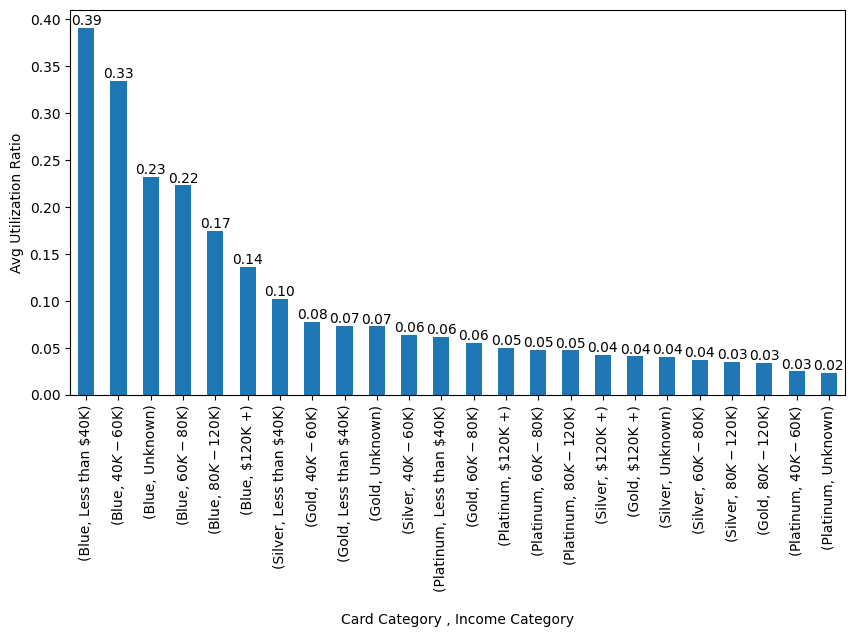

In [99]:
# Grouping by card category & income category to see card utilization trends
view = df.groupby(['Card_Category', 'Income_Category'])['Avg_Utilization_Ratio'].mean().sort_values(ascending=False)

# Using a suitable figure/chart size for the plot
plt.figure(figsize = [10, 5])
ax = view.plot(kind='bar', xlabel="\nCard Category , Income Category" , ylabel= "Avg Utilization Ratio", legend=False)

ax.bar_label(ax.containers[0], fmt='%.2f', label_type= 'edge')

plt.show();

#### Solution:

The plot above shows that on average, Blue credit card customers who earn less than $40k and those who earn between 40k-60k tend to use their credit cards the most; while Platinum credit card customers who earn between 40k-60k and those whose income category is unknown, tend to use their credit card the least.

On average, Blue credit card customers of all income categories tend to use their cards way more than Silver, Gold and Platinum credit card customers. And average usage trends amongst Silver, Gold and Platinum credit card customers who earn higher than 60k does not differ much, indicating that these customers are not heavily dependent on their credit cards and might also suggest that they are less likely to be interested in trying out other credit products/services the bank offers. 

It is worth investigating further to see how factors such as dependent count affect the credit card needs of customers.

### Question 3: How does income category & number of dependents per customer affect their credit card needs or usage?

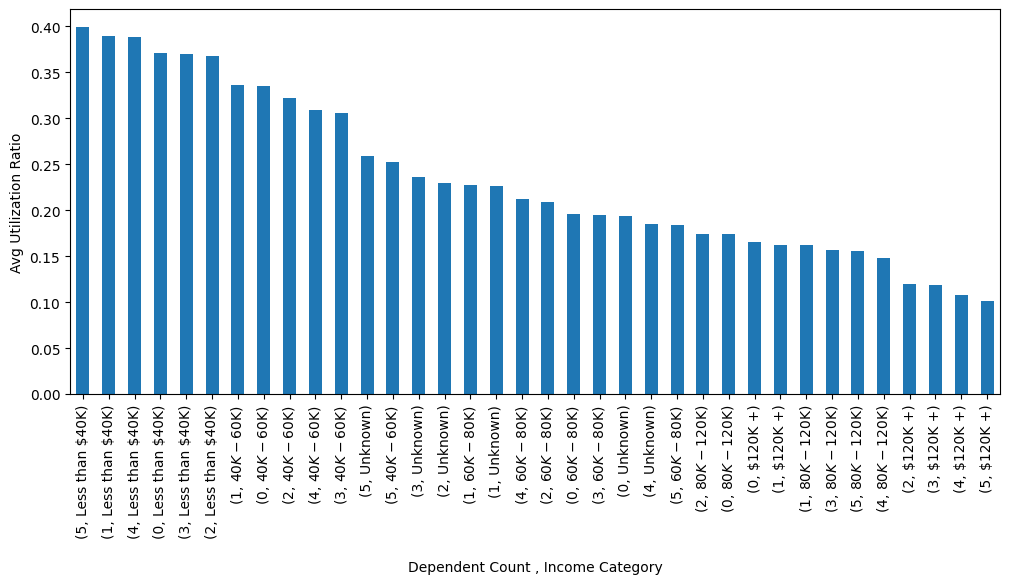

In [102]:
# Grouping by dependent count & income category to see card utilization trends
view = df.groupby(['Dependent_count', 'Income_Category'])['Avg_Utilization_Ratio'].mean().sort_values(ascending=False)

# Using a suitable figure/chart size for the plot
plt.figure(figsize = [12, 5])
ax = view.plot(kind='bar', xlabel="\nDependent Count , Income Category" , ylabel= "Avg Utilization Ratio", legend=False)

#ax.bar_label(ax.containers[0], fmt='%.2f', label_type= 'edge')

plt.show();

#### Solution:
There is no clear correlation between credit card utilization and number of dependants, but when income category is grouped with dependent count, some ineteresting insights can be obtained.

We can see that on average, customers who earn less than 40k use their credit cards the most regardless of their number of dependants.
Customers who earn between 40k-60k and those who earn between 60k-80k are not significantly different in their card usage rates regardless of their dependent count.
But as earnings further increased, we observed a trend where credit card utilization decreased as number of dependants increased, especially for customers earning 120k or higher.

In general, Card Utilization decreased as income increased suggesting that customers who earn higher tend to use their credit cards less.  

### Question 4: What age groups utilize their credit cards the most and the least? And What age groups have the most churned customers?

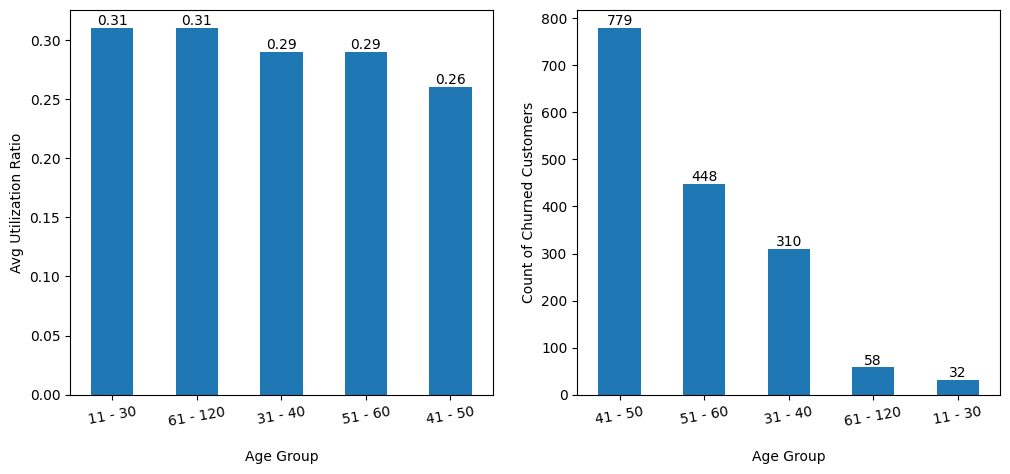

In [105]:
# Creating a new column to group customers according to their age groups
import numpy as np

conditions = [
    (df['Customer_Age'] > 10) & (df['Customer_Age']  <= 30),
    (df['Customer_Age']  > 30) & (df['Customer_Age']  <= 40),
    (df['Customer_Age']  > 40) & (df['Customer_Age']  <= 50),
    (df['Customer_Age']  > 50) & (df['Customer_Age']  <= 60),
    (df['Customer_Age']  > 60) & (df['Customer_Age']  <= 120)
    ]

values = ['11 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 120']
    
df['age_group'] = np.select(conditions, values)



first_view = df.groupby(['age_group'])[('Avg_Utilization_Ratio')].apply(lambda x: np.round(x.mean(), 2)).sort_values(ascending=False)

second_view = df.groupby(['age_group'])['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').sum()).sort_values(ascending=False)

# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [12, 5]) 

# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1)
# Plot a bar chart with the data
ax = first_view.plot(kind='bar', xlabel="\nAge Group" , ylabel= "Avg Utilization Ratio", legend=False)
# Include the bar labels
ax.bar_label(ax.containers[0], label_type= 'edge')
# Rotate the x ticks
plt.xticks(rotation=10)

# 1 row, 2 cols, subplot 2
plt.subplot(1, 2, 2)
# Plot a bar chart with the data
ax = second_view.plot(kind='bar', xlabel="\nAge Group" , ylabel= "Count of Churned Customers", legend=False)
# Include the bar labels
ax.bar_label(ax.containers[0], label_type= 'edge')
# Rotate the x ticks
plt.xticks(rotation=10)

# Now show the figure
plt.show();

#### Solution:
Here we see that on average, the difference in credit card utilization amongst age groups is not so much; with customers in the 11-30 age group using their credit cards the most while customers in thee 41-50 age groups have the lowest utilization ratio.
However, the count of churned customers per age group adds context to this analysis. Now we see that the customers aged between 41 and 50 have churned the most, while customers between 11 and 30 churned the least.
From this perspective, a big focus should be made on customers in the 41-50 age group, and more data should be collected to enrich the dataset and provide deeper insights about this group of customers in particular and all age groups in general.

 -------------------------------------------------------------------------------------------------------------------- 